# Project 1: What are the determinants of IPO underpricing phenomena?

The data used for this project includes successful U.S. IPOs from more than 600 companies. Our client is interested in which features are most important to the "underpricing" phenomenon most commenly seen in the stock market. By using advanced and novel methods to prepare the collected IPO data, we will break down the data in order to process it through pahses of a CRISP-DM model. 

Our project pipeline is as follows: 
- Descriptive
- Imputation
- Calcuation
- Normalization **
- Standardization **
- Outlier Detection

## Descriptive Statistics 

Descriptive statistics are a way to summerize a given set of data. They are used to give a quick snapshot of the data. Typically, descriptive statistics are broken down into measures of central tendency and measures of variability. Measures of central tendency would include mean, median, and mode, while measures of variability include standard deviation, variance, min/max values, and skewness. We used both methods of descriptive statistics in this project.  

Descriptive statistics can also be used to decribe the number of overall records, the number of missing records, and any other information you think is useful for an outsider to understand the dataset. 

In [2]:
# imports
import pandas as pd
import numpy as np

We read in the raw dataset in a pandas DataFrame with `read_csv()` and checked the contents with `.head()`.

In [3]:
# read in the whole file and '-' as NA values 
data = pd.read_excel('Competition1_raw_data.xlsx', na_values=r'-')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


We can see the dataset contains all kind of information about the company. For example, we can see the IPO pricing (`P(IPO`, `P(H)`, `P(L)`, `P(1day)`) for each company and IPO characteristics (`C1`, `C2`, `C3`, `C4`, `C5`, `C6`, `C7`)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


We see there are missing values in all columns but `I1` and `I2`. Moreover, some do not have the correct data type.

## Descriptive Statistics- Part 1

To begin, we wanted to take a look at the raw data. Here we have some statistics on the unchanged dataset. We can use this to compare to our imputed dataset, which we will perform a more extensive look on.

In [5]:
data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


## Imputation

Unfortuantly, most data is not without missing values. As a result, imputation must be performed in order to replace those missing values with actual values. These missing values are typically seen as NaNs in the dataset. There are several imputation options, including: forward fill, backward fill, mean, median, mode, and filling with online research. 

- forward-fill 
`df.fillna(method='ffill')`

- backward-fill 
`df.fillna(method='bfill')` 

- mean, median, mode 
`df.fillna(df.mean())`

You may also drop data that is missing from a  dataset, however, this method is highly discouraged because you are loosing data.

When filling any missing data within a dataset, you risk intorucing error. As a result, we began our imputation with online research. 

The missing Standard Industry Classifier (`I3`) values were filled using information we foudn online. By searching the Ticker (`I1`) and the Company Name (`I2`), we were able to determine which `I3` value would be most appropriate. 

The rest of our missing values were filled using the mean of the column. We also tested using the median, however, the end validation results were not as high. Forward fill and backward fill imputation cannot be used with this dataset because each row represents a different company. If either of these mehtods were used, incorrect data would be inserted. 

Some imputation notes:
- C Column can be 0 and less than 0, no dash
- S can be 0 CANNOT be less than 0, no dash
- T3-T5 --> can be 0, and less than 0, no dash
- T1 --> CANNOT be 0, less than 0, no dashes 
- T2 --> CANNOT be 0, less than 0, no dashes
- P --> CANNOT be 0, less than 0, no dashes

In [8]:
# replace with nan
data.loc[(data['S1'] < 0),'S1'] = np.nan
data.loc[(data['T2'] == 0),'T2'] = np.nan
data.loc[(data['T5'] < 0),'T5'] = np.nan

# drop - for P values 
data.dropna(subset=['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'], inplace=True)

# impute--using mean for imputation since it gave consistent higher validation scores thoughout testing process
# median gave second highest validation scores
data['S1'] = data['S1'].fillna(data['S1'].mean())
data['T2'] = data['T2'].fillna(data['T2'].mean())
data['T5'] = data['T5'].fillna(data['T5'].mean())
data['C3_impute'] = data['C3'].fillna(data['C3'].mean())
data['C7_impute'] = data['C7'].fillna(data['C7'].mean())

# exclude not imputed C3 and C7
data = data[['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2',
       'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'C3_impute', 'C7_impute']]

In [9]:
data[data['T5']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [11]:
data.isnull().sum()

I1           0
I2           0
I3           0
P(IPO)       0
P(H)         0
P(L)         0
P(1Day)      0
C1           0
C2           0
C4           0
C5           0
C6           0
T1           0
T2           0
T3           0
T4           0
T5           0
S1           0
S2           0
S3           0
C3_impute    0
C7_impute    0
dtype: int64

In [12]:
data[data['P(1Day)']<0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


## ERROR WITH C3`

In [13]:
# C2 to int (booleon)
data['C2'] = data['C2'].astype(int)

# P(mid) calculation and add it to the column 
# P(mid) = (P(H)+P(L))/2
data['P(mid)'] = (data['P(H)'] + data['P(L)'])/2

# targets to be calculated
# make it equal to P(IPO) then we will just replace
#data['Y1'] = data['P(IPO)']
#data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data['Y1'] = np.where((data['P(IPO)'] < data['P(mid)']), 1, 0)
data['Y2'] = np.where((data['P(IPO)'] > data['P(mid)']), 1, 0)
#data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
#data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
#data['Y1'] = data['Y1'].astype(int)

# replace Y2
#data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
#data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
#data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
#data['C3`'] = data['C3_impute']
#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)
#data['C3`'] = np.where((data['C3_impute'] > 0),1,data['C3_impute'])
#data['C3`'] = np.where((data['C3_impute'] < 0),0,data['C3_impute'])
#data['C3`'] = np.where((data['C3_impute'] == 0),1,data['C3_impute'])
#data['C3`'] = data['C3_impute']
def c3_prime(c3_impute):
    if c3_impute > 0:
        return (1)
    else:
        return (0)
    
data['C3`'] = data['C3_impute'].apply(c3_prime)
data['C3`'] = data['C3`'].astype(int)

# C5`
data['C5`'] = data['C5']/data['C6']
data['C5`'] = data['C5`'].astype(float)

# C6`
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])
data['C6`'] = np.where((data['P(mid)']==0),0,data['C6`'])
data['C6`'] = data['C6`'].astype(float)

In [14]:
data['C3`'].value_counts()

1    339
0    321
Name: C3`, dtype: int64

In [15]:
# replace T3, and T4
data.loc[(data['T3'] == 0),'T3'] = np.nan
data.loc[(data['T4'] == 0),'T4'] = np.nan

# fillna
data['T3'] = data['T3'].fillna(data['T3'].mean())
data['T4'] = data['T4'].fillna(data['T4'].mean())

After imputing all missing values, we needed to create ratios for our Textual Characteristics: `T1`, `T2`, `T3`, `T4`, `T5` and our Sentiment Characteristics: `S1`, `S2`, `S3`

Creating ratios is important because it gives a meaning to a value. You want to avoid using actual counts.  

In [17]:
#ratios to create prime values
data["T1prime"] = data["T4"].astype(float)/data["T1"].astype(float)
# T2
data['T2prime'] = data['T5'].astype(float)/data['T2'].astype(float)
#percent of real words
data["T3prime"] = data["T3"].astype(float)/data["T2"].astype(float)
#percent of long sentences
data["T4prime"] = data["T1"].astype(float)/data["T4"].astype(float)
# percent of long words 
data["T5prime"] = data["T5"].astype(float)/data["T2"].astype(float)
#percent of positive words
data["S1prime"] = data["S1"].astype(float)/data["T2"].astype(float)
#percent of negative words
data["S2prime"] = data["S2"].astype(float)/data["T2"].astype(float)
#percent of uncertain words
data["S3prime"] = data["S3"].astype(float)/data["T2"].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 37 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null int64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
P(mid)       660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
C3`          660 non-null int64
C5`          660 non-n

In [19]:
# exclude C6Calc, C6' and put Y1, Y2 at the end
# only include continous 
data_copy = data.copy()
data1 = data_copy[['C1', 'C4',
       'C5', 'C6', 'C3_impute',
       'C7_impute', 'C5`',
       'T1prime', 'T2prime','T3prime', 'T4prime', 'T5prime', 'S1prime',
       'S2prime', 'S3prime','Y1', 'Y2']]

In [20]:
# make a csv file
data1.to_csv('omg2.csv')

## Descriptive Statistics- Part 2

Now that we have imputed all missing values and created our ratios, we can now perfrom another round of descriptive statistics on our altered dataset.

Here we are using `data1`, which removed the original `T` and `S` columns and replaced them with the created ratios. We also have our new imputed columns with no missing values. We can see that our measures have changed significantly from our original output of `data`. 

In [ ]:
#it is important to note that all columns have 660 values--no missing values

In [24]:
data1.describe()

,C1,C4,C5,C6,C3_impute,C7_impute,C5`,T1prime,T2prime,T3prime,T4prime,T5prime,S1prime,S2prime,S3prime,Y1,Y2
count,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.007282,4.996285e+07,1.258248e+07,0.069242,506.948305,4.417255,0.628602,0.052261,0.895091,1.611227,0.052261,0.005318,0.009055,0.011515,0.500000,0.383333
std,152.817467,0.033318,1.055377e+08,2.539940e+07,158.390377,1583.636798,5.133537,0.069568,0.007061,0.039542,0.187162,0.007061,0.001743,0.002990,0.002842,0.500379,0.486567
min,10.000000,-0.162352,3.693227e+06,8.000000e+05,-786.239000,0.074000,0.283223,0.395480,0.031595,0.711331,1.210145,0.031595,0.001602,0.002152,0.005326,0.000000,0.000000
25%,85.000000,-0.013927,1.877568e+07,5.124546e+06,-0.795000,41.458000,2.850622,0.580907,0.047562,0.883551,1.482666,0.047562,0.004134,0.006966,0.009579,0.000000,0.000000
50%,107.000000,0.009125,2.745438e+07,7.500000e+06,0.035000,133.102000,3.731035,0.628861,0.051943,0.897424,1.590177,0.051943,0.005041,0.008577,0.011301,0.500000,0.000000
75%,155.250000,0.031571,5.003986e+07,1.200000e+07,0.402500,506.948305,4.857904,0.674461,0.056544,0.909693,1.721447,0.056544,0.006256,0.010521,0.012848,1.000000,1.000000
max,2087.000000,0.092896,2.138085e+09,4.212336e+08,3864.500000,30683.000000,99.787255,0.826347,0.088061,1.486023,2.528571,0.088061,0.012839,0.024605,0.029397,1.000000,1.000000


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 17 columns):
C1           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
C5`          660 non-null float64
T1prime      660 non-null float64
T2prime      660 non-null float64
T3prime      660 non-null float64
T4prime      660 non-null float64
T5prime      660 non-null float64
S1prime      660 non-null float64
S2prime      660 non-null float64
S3prime      660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 92.8 KB


# Normality test

In [26]:
# categorical no standardization, normalization
# if skew is between -0.5 and 0.5 it will be consider normalized 

In [27]:
pd.plotting.scatter_matrix(data1[['S1prime', 'S2prime', 'S3prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcaf278160>,
      dtype=object)

In [28]:
print('S1prime: ',data1['S1prime'].skew())
print('S2prime: ',data1['S2prime'].skew())
print('S3prime: ',data1['S3prime'].skew())

S1prime:  0.9339775496433853
S2prime:  1.1913004106056746
S3prime:  1.3867722660900483


In [29]:
# alternative use Shapiro but its too strict
# only for the continuous 
# another skewness test --> request skewness from pandas 
# and look at the histograms 
from scipy.stats import shapiro
stat, p = shapiro(data['S1prime'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)


In [30]:
data1['S1prime_norm']=np.log((data1['S1prime']))
data1['S2prime_norm']=np.log((data1['S2prime']))
data1['S3prime_norm'] = np.log(data1['S3prime'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

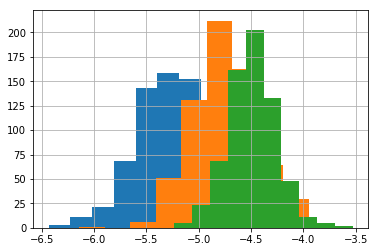

In [31]:
data1['S1prime_norm'].hist()
data1['S2prime_norm'].hist()
data1['S3prime_norm'].hist()

In [33]:
#histogram follows 'normal' bell shaped curve

In [34]:
print('S1prime normalized: ' , data1['S1prime_norm'].skew())
print('S2prime normalized: ' , data1['S2prime_norm'].skew())
print('S3prime normalized: ' , data1['S3prime_norm'].skew())

S1prime normalized:  -0.12770139987558649
S2prime normalized:  0.0767078840055317
S3prime normalized:  0.2151506322337023


In [35]:
# outliers --> IQR and 3st dev method 
# we standardize all but Y's right? 
# binning? 
# select only continous variables to put into evaluation code

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcaaada1d0>,
      dtype=object)

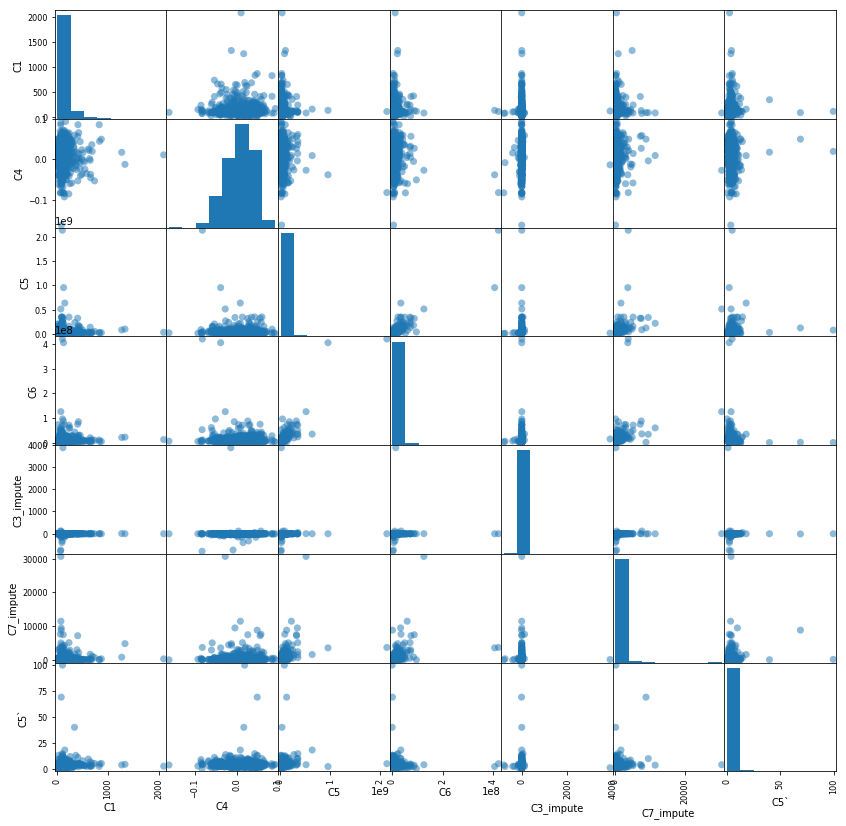

In [36]:
pd.plotting.scatter_matrix(data1[['C1', 'C4',
       'C5', 'C6', 'C3_impute',
       'C7_impute', 'C5`']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [38]:
#must use .skew() to fix the right skews seen above

In [39]:
# test
print('C1: ',data1['C1'].skew())
print('C3_impute: ',data1['C3_impute'].skew())
print('C4: ',data1['C4'].skew())
print('C5: ',data1['C5'].skew())
print('C6: ',data1['C6'].skew())
print('C7_impute: ',data1['C7_impute'].skew())
print('C5prime: ',data1['C5`'].skew())
#print('C6prime: ',data1['C6`'].skew())

C1:  5.649484948760403
C3_impute:  21.727205834622886
C4:  -0.4778924619388421
C5:  13.461311505350828
C6:  12.439170657119098
C7_impute:  12.192094800449242
C5prime:  13.405535814317505


In [40]:
data1['C1_norm'] = np.log(data1['C1'])
data1['C3_norm'] = np.tanh(data1['C3_impute']+1)
data1['C5_norm'] = 1/(np.log(data1['C5']))
data1['C6_norm'] = 1/(np.log(data1['C6']))
data1['C7_norm'] = np.log(data1['C7_impute']+1)
data1['C5prime_norm'] = np.log(data1['C5`'])
#data1['C6prime_norm'] = np.sqrt(np.log(data1['C6`']+1))

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

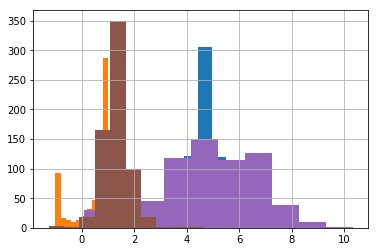

In [41]:
data1['C1_norm'].hist()
data1['C3_norm'].hist()
data1['C5_norm'].hist()
data1['C6_norm'].hist()
data1['C7_norm'].hist()
data1['C5prime_norm'].hist()
#data1['C6prime_norm'].hist()

In [42]:
print('C1_normalized: ', data1['C1_norm'].skew())
print('C3_normalized: ', data1['C3_norm'].skew())
print('C5_normalized: ', data1['C5_norm'].skew())
print('C6_normalized: ', data1['C6_norm'].skew())
print('C7_normalized: ', data1['C7_norm'].skew())
print('C5prime_normalized: ', data1['C5prime_norm'].skew())
#print('C6prime_normalized: ', data1['C6prime_norm'].skew())

C1_normalized:  0.13206924296483574
C3_normalized:  -1.2223933661755828
C5_normalized:  -0.3913588014366576
C6_normalized:  -0.3936679536459565
C7_normalized:  -0.3531006261040392
C5prime_normalized:  0.4273718005667461


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbca9e28240>,
      dtype=object)

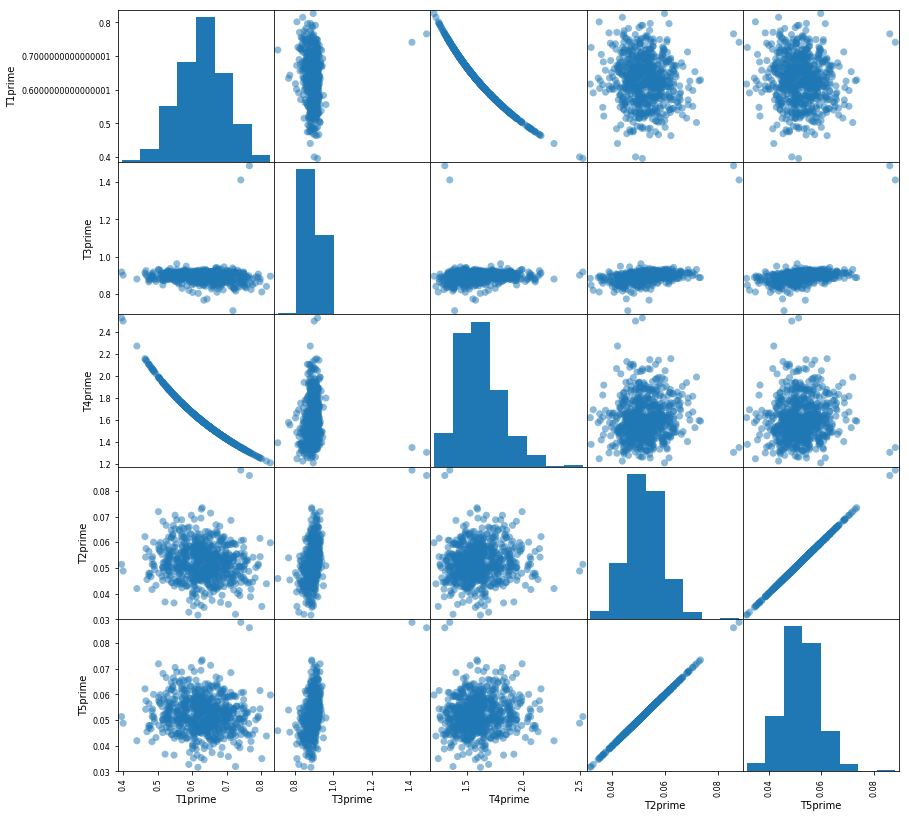

In [43]:
pd.plotting.scatter_matrix(data1[['T1prime','T3prime', 'T4prime', 'T2prime','T5prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [45]:
# T1 looks good 

In [46]:
print('T1prime: ', data1['T1prime'].skew())
print('T2prime: ', data1['T2prime'].skew())
print('T3prime: ', data1['T3prime'].skew())
print('T4prime: ', data1['T4prime'].skew())
print('T5prime: ', data1['T5prime'].skew())

T1prime:  -0.07735461477710555
T2prime:  0.41084438669301393
T3prime:  7.979616847783
T4prime:  0.8282140120955176
T5prime:  0.41084438669301393


In [47]:
data1['T2prime_norm'] = np.sqrt(data1['T2prime'])
data1['T3prime_norm'] = 1/(np.log(data1['T3prime']))
data1['T4prime_norm'] = np.log(data1['T4prime'])
data1['T5prime_norm'] = np.sqrt(data1['T5prime'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [48]:
print('T2prime_norm: ', data1['T2prime_norm'].skew())
print('T3prime_norm: ', data1['T3prime_norm'].skew())
print('T4prime_norm: ', data1['T4prime_norm'].skew())
print('T5prime_norm: ', data1['T5prime_norm'].skew())

T2prime_norm:  0.0968040448556735
T3prime_norm:  -0.47402485520542714
T4prime_norm:  0.42612462287499436
T5prime_norm:  0.0968040448556735


In [49]:
data1.columns

Index(['C1', 'C4', 'C5', 'C6', 'C3_impute', 'C7_impute', 'C5`', 'T1prime',
       'T2prime', 'T3prime', 'T4prime', 'T5prime', 'S1prime', 'S2prime',
       'S3prime', 'Y1', 'Y2', 'S1prime_norm', 'S2prime_norm', 'S3prime_norm',
       'C1_norm', 'C3_norm', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm'],
      dtype='object')

In [51]:
#we select the normalized columns and delete out the original columns---ie: replace S1prime with S1prime_norm

In [52]:
data1 = data1[['S1prime_norm', 'S2prime_norm',
       'S3prime_norm', 'C1_norm', 'C3_norm','C4', 'C5_norm', 'C6_norm', 'C7_norm',
       'C5prime_norm', 'T1prime','T2prime_norm', 'T3prime_norm',
       'T4prime_norm', 'T5prime_norm','Y1','Y2']]
data1.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,-5.323718,-4.688678,-4.516378,4.804021,0.999716,0.029074,0.057051,0.061819,3.957856,1.351792,0.640426,0.232915,-10.466155,0.445622,0.232915,0,1
1,-5.726618,-4.500360,-4.521238,5.556828,-0.551128,-0.013352,0.058213,0.068069,3.293464,2.487306,0.644753,0.226705,-9.365141,0.438887,0.226705,1,0
2,-4.457393,-5.071759,-4.473922,4.499810,-0.235496,0.020715,0.060098,0.064830,2.125609,1.214656,0.636816,0.248523,-10.523529,0.451275,0.248523,1,0
3,-4.637032,-4.941521,-4.318578,5.342334,0.089758,0.020023,0.060557,0.065276,2.254025,1.193831,0.539634,0.248253,-11.549720,0.616864,0.248253,1,0
4,-5.399715,-4.600461,-4.486414,4.382027,0.789461,-0.034895,0.058001,0.062791,6.450941,1.315407,0.587413,0.220341,-8.456290,0.532028,0.220341,0,1


In [53]:
data1.to_csv('normalized.csv')

# Outliers

An outlier is a data point that is significantly different from all other data points. Usually, an outlier does not follow the pattern of the data. We removed ourliers because we do not want these rougue values to effect our final result. 

Here, we seperated investigating our `upper bound` and `lower bound` outliers. An upper bound outlier fall above the outer bound of the dataset, while a lower bound outlier falls below the lower bound. 


In [54]:
# try running before doing outliers and make assumption to why you would do this and maybe only for some columns 
# 3 standard deviation for normalization, IQR normalization not needed

In [57]:
# exclude target variables
data2 = data1[['S1prime_norm', 'S2prime_norm',
       'S3prime_norm', 'C1_norm', 'C3_norm','C4', 'C5_norm', 'C6_norm', 'C7_norm',
       'C5prime_norm', 'T1prime','T2prime_norm', 'T3prime_norm',
       'T4prime_norm', 'T5prime_norm']]

In [58]:
# investigating the nature of the outliers - upper bound
for cols in data1.columns:
    u_bound = data1[cols].mean() + 3* data1[cols].std()
    print('Upper Bound: ', u_bound)
    print(cols, data1[cols][data1[cols]>u_bound],'\n')
#my_col[my_col>u_bound]
# investigating the nature of the outliers - lower bound
for cols in data1.columns:
    l_bound = data1[cols].mean() - 3* data1[cols].std()
    print('Lower Bound: ', l_bound)
    print(cols, data1[cols][data1[cols]<l_bound],'\n')

Upper Bound:  -4.3163602943385
S1prime_norm Series([], Name: S1prime_norm, dtype: float64) 

Upper Bound:  -3.8082170303642195
S2prime_norm 275   -3.704811
425   -3.789398
Name: S2prime_norm, dtype: float64 

Upper Bound:  -3.79103974525213
S3prime_norm 50    -3.717956
111   -3.790985
188   -3.666246
271   -3.784827
382   -3.526857
416   -3.704075
Name: S3prime_norm, dtype: float64 

Upper Bound:  6.768811483082619
C1_norm 65     7.643483
391    7.193686
665    7.144407
Name: C1_norm, dtype: float64 

Upper Bound:  2.4677355191782175
C3_norm Series([], Name: C3_norm, dtype: float64) 

Upper Bound:  0.10723513361722141
C4 Series([], Name: C4, dtype: float64) 

Upper Bound:  0.06611599225840087
C5_norm 313    0.066129
Name: C5_norm, dtype: float64 

Upper Bound:  0.07156774142647779
C6_norm 58     0.073571
78     0.071886
204    0.073571
Name: C6_norm, dtype: float64 

Upper Bound:  10.247462888087924
C7_norm 275    10.331497
Name: C7_norm, dtype: float64 

Upper Bound:  2.84609802663475

In [59]:
# going for all the columns - upper bound
for col in data1.columns:
    u_bound = data1[col].mean() + 3* data1[col].std()
    data1[col][data1[col] > u_bound] = u_bound

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
# going for all the columns - lower bound
for col in data1.columns:
    l_bound = data1[col].mean() - 3* data1[col].std()
    data1[col][data1[col] < l_bound] = l_bound

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:
# verifying there is no value greater than the upper boundary--upper bound outliers removed
for cols in data1.columns:
    print(cols, (data1[cols]>u_bound).value_counts(),'\n')
    #print(cols,data1[cols]>u_bound.value_counts())
#pd.Series(my_col>u_bound).value_counts()
# checkin lower bound 
for cols in data1.columns:
    print(cols, (data1[cols]<l_bound).value_counts(),'\n')

S1prime_norm False    660
Name: S1prime_norm, dtype: int64 

S2prime_norm False    660
Name: S2prime_norm, dtype: int64 

S3prime_norm False    660
Name: S3prime_norm, dtype: int64 

C1_norm True    660
Name: C1_norm, dtype: int64 

C3_norm False    660
Name: C3_norm, dtype: int64 

C4 False    660
Name: C4, dtype: int64 

C5_norm False    660
Name: C5_norm, dtype: int64 

C6_norm False    660
Name: C6_norm, dtype: int64 

C7_norm True     608
False     52
Name: C7_norm, dtype: int64 

C5prime_norm False    585
True      75
Name: C5prime_norm, dtype: int64 

T1prime False    660
Name: T1prime, dtype: int64 

T2prime_norm False    660
Name: T2prime_norm, dtype: int64 

T3prime_norm False    660
Name: T3prime_norm, dtype: int64 

T4prime_norm False    660
Name: T4prime_norm, dtype: int64 

T5prime_norm False    660
Name: T5prime_norm, dtype: int64 

Y1 False    660
Name: Y1, dtype: int64 

Y2 False    660
Name: Y2, dtype: int64 

S1prime_norm True    660
Name: S1prime_norm, dtype: int64 

In [62]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 15 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
dtypes: float64(15)
memory usage: 82.5 KB


In [65]:
#continue to check for NaNs throughout 

In [66]:
data2.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
dtype: int64

In [67]:
# add Y1 and Y2
data3 = pd.concat([data2,data1[['Y1','Y2']]], axis = 1)

In [68]:
data3.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,-5.323718,-4.688678,-4.516378,4.804021,0.999716,0.029074,0.057051,0.061819,3.957856,1.351792,0.640426,0.232915,-10.466155,0.445622,0.232915,0,1
1,-5.726618,-4.500360,-4.521238,5.556828,-0.551128,-0.013352,0.058213,0.068069,3.293464,2.487306,0.644753,0.226705,-9.365141,0.438887,0.226705,1,0
2,-4.457393,-5.071759,-4.473922,4.499810,-0.235496,0.020715,0.060098,0.064830,2.125609,1.214656,0.636816,0.248523,-10.523529,0.451275,0.248523,1,0
3,-4.637032,-4.941521,-4.318578,5.342334,0.089758,0.020023,0.060557,0.065276,2.254025,1.193831,0.539634,0.248253,-11.549720,0.616864,0.248253,1,0
4,-5.399715,-4.600461,-4.486414,4.382027,0.789461,-0.034895,0.058001,0.062791,6.450941,1.315407,0.587413,0.220341,-8.456290,0.532028,0.220341,0,1


In [69]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 17 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 92.8 KB


In [70]:
data3.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
dtype: int64

In [71]:
data3.to_csv('Outlier_normalized.csv')

In [72]:
data3.columns

Index(['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm', 'T1prime',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm', 'Y1',
       'Y2'],
      dtype='object')

# Standardization - zscore

In [74]:
# exclude the Y1, Y2

In [75]:
# import z score
from scipy import stats

data4 = data3[['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm']]

# make sure to exclude the Y1 and Y2
data4 = np.abs(stats.zscore(data4))
data4 = pd.DataFrame(data4)
data4.columns = ['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C3_norm',
       'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm']
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm
0,0.108951,0.209238,0.104924,0.069129,0.850419,0.654566,0.368850,0.356508,0.473003,0.059313,0.170080,0.313703,0.517295,0.220668,0.313703
1,1.353310,0.806628,0.125742,1.192960,1.422844,0.619777,0.063268,1.796881,0.840108,2.295653,0.232339,0.089823,0.028610,0.280352,0.089823
2,2.566697,1.005987,0.076950,0.385014,0.960183,0.403480,0.764109,0.680999,1.485398,0.210771,0.118155,1.327774,0.542761,0.170581,1.327774
3,2.011879,0.592842,0.742409,0.872752,0.483419,0.382698,0.934891,0.834610,1.414443,0.251784,1.279839,1.310267,0.998236,1.296799,1.310267
4,0.343668,0.489084,0.023438,0.560847,0.542223,1.266863,0.015643,0.021321,0.904534,0.012345,0.592529,0.503280,0.374782,0.545019,0.503280


In [76]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
dtypes: float64(15)
memory usage: 77.5 KB


In [77]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
dtype: int64

In [78]:
data3 = data3.reset_index()
data3 = data3.drop('index',axis=1)
data4 = data4.reset_index()
data4 = data4.drop('index',axis=1)

In [79]:
# add back the Y1 and Y2 (maybe also the categoricals)
data4 = pd.concat([data4, data3[['Y1','Y2']]],axis = 1)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2
0,0.108951,0.209238,0.104924,0.069129,0.850419,0.654566,0.368850,0.356508,0.473003,0.059313,0.170080,0.313703,0.517295,0.220668,0.313703,0,1
1,1.353310,0.806628,0.125742,1.192960,1.422844,0.619777,0.063268,1.796881,0.840108,2.295653,0.232339,0.089823,0.028610,0.280352,0.089823,1,0
2,2.566697,1.005987,0.076950,0.385014,0.960183,0.403480,0.764109,0.680999,1.485398,0.210771,0.118155,1.327774,0.542761,0.170581,1.327774,1,0
3,2.011879,0.592842,0.742409,0.872752,0.483419,0.382698,0.934891,0.834610,1.414443,0.251784,1.279839,1.310267,0.998236,1.296799,1.310267,1,0
4,0.343668,0.489084,0.023438,0.560847,0.542223,1.266863,0.015643,0.021321,0.904534,0.012345,0.592529,0.503280,0.374782,0.545019,0.503280,0,1


In [80]:
data4.Y1.value_counts()

1    330
0    330
Name: Y1, dtype: int64

In [81]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(2)
memory usage: 87.8 KB


In [82]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
dtype: int64

In [83]:
data4.to_csv('norm_outlier_zscore.csv')

In [84]:
# add back categoricals: C3` and C2 
# Bin I3 and add it back to the dataframe

Binning and including categorical values in a dataframe

In [85]:
data['C3`'].value_counts()

1    339
0    321
Name: C3`, dtype: int64

In [86]:
data['C3`'].count()

660

# Here

## ADD C3` later

In [87]:
data = data.reset_index()
data = data.drop('index',axis=1)

In [88]:
data4 = pd.concat([data4, data[['C2','I3','C3`']]], axis=1)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
0,0.108951,0.209238,0.104924,0.069129,0.850419,0.654566,0.368850,0.356508,0.473003,0.059313,0.170080,0.313703,0.517295,0.220668,0.313703,0,1,1,3674,1
1,1.353310,0.806628,0.125742,1.192960,1.422844,0.619777,0.063268,1.796881,0.840108,2.295653,0.232339,0.089823,0.028610,0.280352,0.089823,1,0,0,2834,0
2,2.566697,1.005987,0.076950,0.385014,0.960183,0.403480,0.764109,0.680999,1.485398,0.210771,0.118155,1.327774,0.542761,0.170581,1.327774,1,0,1,2834,0
3,2.011879,0.592842,0.742409,0.872752,0.483419,0.382698,0.934891,0.834610,1.414443,0.251784,1.279839,1.310267,0.998236,1.296799,1.310267,1,0,1,2834,0
4,0.343668,0.489084,0.023438,0.560847,0.542223,1.266863,0.015643,0.021321,0.904534,0.012345,0.592529,0.503280,0.374782,0.545019,0.503280,0,1,1,4492,1


In [89]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
C2              660 non-null int64
I3              660 non-null object
C3`             660 non-null int64
dtypes: float64(15), int64(4), object(1)
memory usage: 103.2+ KB


In [90]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
dtype: int64

1
0100-0999	Agriculture, Forestry and Fishing
1000-1499	Mining
4000-4999	Transportation, Communications, Electric, Gas and Sanitary service
1500-1799	Construction
2000-3999	Manufacturing
2
5000-5199	Wholesale Trade
5200-5999	Retail Trade
6000-6799	Finance, Insurance and Real Estate
7000-8999	Services
9100-9729	Public Administration
3
9900-9999	Nonclassifiable

We notice an error in I3 for Dolby Laboratories. It seems they are participating in many industries. However, when searching online we found out that the its a company specializing in audio noise reduction and audio encoding/compression. Dolby licenses its technologies to consumer electronics manufacturers. Therefore we will change its I3 to 4000. 

DTS, Inc. is an American company that makes multichannel audio technologies for film and video. Based in Calabasas, California, the company introduced its DTS technology in 1993 as a higher-quality competitor to Dolby Laboratories. So we will change it to 4000. 

RealD Inc. is a private company known for its RealD 3D system, which is used for projecting films in stereoscopic 3D using circularly polarized light.

UPG's energy storage solutions

In [ ]:
data4[data4['I3']=='6794, 3861, 3663, 7819']

In [92]:
data['I2'].loc[174:,]

174    D. MEDICAL INDUSTRIES LTD. 
175              Diamond Foods Inc
176    DUNKIN' BRANDS GROUP, INC. 
177               DOLE FOOD CO INC
178             DOMINOS PIZZA INC 
                  ...             
655                     ZIPCAR INC
656         Zeltiq Aesthetics Inc 
657     ZST Digital Networks, Inc.
658                    Zumiez Inc 
659                     SEALY CORP
Name: I2, Length: 486, dtype: object

In [93]:
data4[data4['I3']=='3651, 6794, 7819']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
183,0.492272,0.912467,1.201574,0.637421,0.79706,1.103217,1.107354,1.069875,0.593929,0.186588,0.385994,0.163481,0.312618,0.331032,0.163481,0,1,0,"3651, 6794, 7819",1


In [94]:
data['I2'].loc[187:,]

187     DreamWorks Animation, LLC
188                Demandware Inc
189       DESIGN WITHIN REACH INC
190                    DEXCOM INC
191        DUOYUAN PRINTING, INC.
                  ...            
655                    ZIPCAR INC
656        Zeltiq Aesthetics Inc 
657    ZST Digital Networks, Inc.
658                   Zumiez Inc 
659                    SEALY CORP
Name: I2, Length: 473, dtype: object

In [95]:
data4[data4['I3']=='3663, 3861, 6794']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
483,0.798398,0.046902,1.038858,0.257886,0.242489,0.14346,0.550055,0.571391,0.612378,0.031973,0.717916,0.628047,1.716798,0.677495,0.628047,0,1,1,"3663, 3861, 6794",0


In [96]:
data['I2'].loc[499:,]

499            Leidos Holdings, Inc. 
500              Spirit Airlines, Inc
501               SAFE BULKERS, INC. 
502    Sucampo Pharmaceuticals, Inc. 
503       Scopus Video Networks Ltd. 
                    ...              
655                        ZIPCAR INC
656            Zeltiq Aesthetics Inc 
657        ZST Digital Networks, Inc.
658                       Zumiez Inc 
659                        SEALY CORP
Name: I2, Length: 161, dtype: object

In [97]:
data4[data4['I3']=='7389, 5063']

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`
599,0.568652,0.081383,0.678195,0.212872,0.676331,0.223859,2.524046,1.446007,0.223137,1.596929,2.086591,1.572332,0.219835,2.269189,1.572332,1,0,0,"7389, 5063",1


In [98]:
data['I2'].loc[620:,]

620                         Dialogic Inc. 
621                           Verigy Ltd. 
622                Verisk Analytics, Inc. 
623                          VIRTUSA CORP 
624                    VERASUN ENERGY CORP
625                  Vitamin Shoppe, Inc. 
626                         Verastem, Inc.
627            ASSEMBLY BIOSCIENCES, INC. 
628                       WAGEWORKS, INC. 
629           Wesco Aircraft Holdings, Inc
630                     WebMD Health Corp.
631                         WCA WASTE CORP
632           WELLCARE HEALTH PLANS, INC. 
633                   Warner Chilcott plc 
634                         Workday, Inc. 
635                    BOINGO WIRELESS INC
636                   Willdan Group, Inc. 
637                 WESTLAKE CHEMICAL CORP
638                WHITING PETROLEUM CORP 
639    WILLIAMS SCOTSMAN INTERNATIONAL INC
640              Warner Music Group Corp. 
641                 Western Refining, Inc.
642               Great Wolf Resorts, Inc.
643        

In [99]:
data4['I3'] = pd.to_numeric(data4['I3'], errors = 'coerce')
data4['I3'] = data4['I3'].fillna(4000)
data4['I3'] = data4['I3'].astype(int)

In [100]:
# convert to numeric
#all_data['I3'] = all_data['I3'].astype(int)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
Y1              660 non-null int64
Y2              660 non-null int64
C2              660 non-null int64
I3              660 non-null int64
C3`             660 non-null int64
dtypes: float64(15), int64(5)
memory usage: 103.2 KB


In [101]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
dtype: int64

## Encoding

In [102]:
# bin I3 into 4 quantiles 
#all_data['I3_cat'] = pd.qcut(all_data.I3, q=4, labels=False )
def assign_bins(I3):
    if I3 >= 100 and I3 <= 4999:       
        return 1 
    elif (I3 >= 5000) and (I3 <= 9729):       
        return 2
    elif (I3 >= 5200) and (I3 <= 5999):       
        return 2
    elif (I3 >= 9900) and (I3 <= 9999):       
        return 3
    else:       
        return 0

data4['I3_bin'] = data4['I3'].apply(assign_bins)
data4.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,...,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,I3,C3`,I3_bin
0,0.108951,0.209238,0.104924,0.069129,0.850419,0.654566,0.368850,0.356508,0.473003,0.059313,...,0.313703,0.517295,0.220668,0.313703,0,1,1,3674,1,1
1,1.353310,0.806628,0.125742,1.192960,1.422844,0.619777,0.063268,1.796881,0.840108,2.295653,...,0.089823,0.028610,0.280352,0.089823,1,0,0,2834,0,1
2,2.566697,1.005987,0.076950,0.385014,0.960183,0.403480,0.764109,0.680999,1.485398,0.210771,...,1.327774,0.542761,0.170581,1.327774,1,0,1,2834,0,1
3,2.011879,0.592842,0.742409,0.872752,0.483419,0.382698,0.934891,0.834610,1.414443,0.251784,...,1.310267,0.998236,1.296799,1.310267,1,0,1,2834,0,1
4,0.343668,0.489084,0.023438,0.560847,0.542223,1.266863,0.015643,0.021321,0.904534,0.012345,...,0.503280,0.374782,0.545019,0.503280,0,1,1,4492,1,1


In [103]:
data4.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
Y1              0
Y2              0
C2              0
I3              0
C3`             0
I3_bin          0
dtype: int64

## One-hot encoding
all_data_one_hot = all_data.copy()

all_data_one_hot = pd.get_dummies(all_data_one_hot, columns=['I3'], prefix = ['industry'])

all_data_one_hot.head()

In [104]:
# we drop I3 because we have bins now and we do not need the I3 column anymore
data4 = data4.drop('I3',axis=1)

In [105]:
I3_one_hot = data4.copy()
I3bin_one_hot = pd.get_dummies(I3_one_hot, columns=['I3_bin'], prefix = ['industry'])
I3bin_one_hot.head()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C3_norm,C4,C5_norm,C6_norm,C7_norm,C5prime_norm,...,T3prime_norm,T4prime_norm,T5prime_norm,Y1,Y2,C2,C3`,industry_0,industry_1,industry_2
0,0.108951,0.209238,0.104924,0.069129,0.850419,0.654566,0.368850,0.356508,0.473003,0.059313,...,0.517295,0.220668,0.313703,0,1,1,1,0,1,0
1,1.353310,0.806628,0.125742,1.192960,1.422844,0.619777,0.063268,1.796881,0.840108,2.295653,...,0.028610,0.280352,0.089823,1,0,0,0,0,1,0
2,2.566697,1.005987,0.076950,0.385014,0.960183,0.403480,0.764109,0.680999,1.485398,0.210771,...,0.542761,0.170581,1.327774,1,0,1,0,0,1,0
3,2.011879,0.592842,0.742409,0.872752,0.483419,0.382698,0.934891,0.834610,1.414443,0.251784,...,0.998236,1.296799,1.310267,1,0,1,0,0,1,0
4,0.343668,0.489084,0.023438,0.560847,0.542223,1.266863,0.015643,0.021321,0.904534,0.012345,...,0.374782,0.545019,0.503280,0,1,1,1,0,1,0


In [106]:
I3bin_one_hot.Y1.value_counts()

1    330
0    330
Name: Y1, dtype: int64

In [108]:
# reorganize df--place cateogries created in one hot before the Y1 and Y2
# one hot encoding allows for less machine confusion that the numerics of binning can cause
I3bin_one_hot = I3bin_one_hot[['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm','C2', 
        'C3`', 'C3_norm','C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm', 'T1prime',
       'T2prime_norm', 'T3prime_norm', 'T4prime_norm', 'T5prime_norm', 'industry_0', 'industry_1', 'industry_2',
        'Y1','Y2']]
I3bin_one_hot.head(3)

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C2,C3`,C3_norm,C4,C5_norm,C6_norm,...,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,industry_0,industry_1,industry_2,Y1,Y2
0,0.108951,0.209238,0.104924,0.069129,1,1,0.850419,0.654566,0.368850,0.356508,...,0.170080,0.313703,0.517295,0.220668,0.313703,0,1,0,0,1
1,1.353310,0.806628,0.125742,1.192960,0,0,1.422844,0.619777,0.063268,1.796881,...,0.232339,0.089823,0.028610,0.280352,0.089823,0,1,0,1,0
2,2.566697,1.005987,0.076950,0.385014,1,0,0.960183,0.403480,0.764109,0.680999,...,0.118155,1.327774,0.542761,0.170581,1.327774,0,1,0,1,0


In [109]:
I3bin_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 22 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C2              660 non-null int64
C3`             660 non-null int64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
industry_0      660 non-null uint8
industry_1      660 non-null uint8
industry_2      660 non-null uint8
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(4), uint8(3)
memory usage: 100.0 KB


In [110]:
I3bin_one_hot[['industry_0','industry_1','industry_2']] = I3bin_one_hot[['industry_0','industry_1','industry_2']].astype(int)
I3bin_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 22 columns):
S1prime_norm    660 non-null float64
S2prime_norm    660 non-null float64
S3prime_norm    660 non-null float64
C1_norm         660 non-null float64
C2              660 non-null int64
C3`             660 non-null int64
C3_norm         660 non-null float64
C4              660 non-null float64
C5_norm         660 non-null float64
C6_norm         660 non-null float64
C7_norm         660 non-null float64
C5prime_norm    660 non-null float64
T1prime         660 non-null float64
T2prime_norm    660 non-null float64
T3prime_norm    660 non-null float64
T4prime_norm    660 non-null float64
T5prime_norm    660 non-null float64
industry_0      660 non-null int64
industry_1      660 non-null int64
industry_2      660 non-null int64
Y1              660 non-null int64
Y2              660 non-null int64
dtypes: float64(15), int64(7)
memory usage: 113.6 KB


In [111]:
I3bin_one_hot.Y1.value_counts()

1    330
0    330
Name: Y1, dtype: int64

In [112]:
I3bin_one_hot.isnull().sum()

S1prime_norm    0
S2prime_norm    0
S3prime_norm    0
C1_norm         0
C2              0
C3`             0
C3_norm         0
C4              0
C5_norm         0
C6_norm         0
C7_norm         0
C5prime_norm    0
T1prime         0
T2prime_norm    0
T3prime_norm    0
T4prime_norm    0
T5prime_norm    0
industry_0      0
industry_1      0
industry_2      0
Y1              0
Y2              0
dtype: int64

In [113]:
I3bin_one_hot.describe()

,S1prime_norm,S2prime_norm,S3prime_norm,C1_norm,C2,C3`,C3_norm,C4,C5_norm,C6_norm,...,T1prime,T2prime_norm,T3prime_norm,T4prime_norm,T5prime_norm,industry_0,industry_1,industry_2,Y1,Y2
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.789102,0.786657,0.772983,0.695735,0.859091,0.513636,0.818081,0.801209,0.767458,0.756162,...,0.792187,0.777712,0.726460,0.785824,0.777712,0.003030,0.593939,0.403030,0.500000,0.383333
std,0.614729,0.617859,0.634908,0.718843,0.348192,0.500193,0.575539,0.598839,0.641586,0.654881,...,0.610741,0.629098,0.687729,0.618919,0.629098,0.055006,0.491469,0.490879,0.500379,0.486567
min,0.000100,0.000250,0.003368,0.006157,0.000000,0.000000,0.003442,0.002729,0.002108,0.006411,...,0.001478,0.000677,0.001344,0.002997,0.000677,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.334165,0.310960,0.281559,0.227726,1.000000,0.000000,0.501374,0.334753,0.289990,0.279514,...,0.295665,0.304787,0.274809,0.289071,0.304787,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.647312,0.647161,0.628639,0.470343,1.000000,1.000000,0.655564,0.696636,0.614215,0.578639,...,0.668986,0.648346,0.556980,0.661530,0.648346,0.000000,1.000000,0.000000,0.500000,0.000000
75%,1.114168,1.123199,1.092139,0.816339,1.000000,1.000000,0.846186,1.202282,1.046389,1.008853,...,1.180596,1.075661,1.041857,1.150786,1.075661,0.000000,1.000000,1.000000,1.000000,1.000000
max,3.545055,4.398379,4.133980,4.308033,1.000000,1.000000,2.080810,5.095282,4.274781,4.305683,...,3.353543,4.461326,7.344653,4.050890,4.461326,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
#we still have retained all 660 values thoughout the process

## Correlation

Correlation will show how strongly pairs of variables are related. In our case, we want to see which variables are most correlated to `Y1` and `Y2`


In [115]:
s1 = I3bin_one_hot.corr()['Y1'] > 0.3 
s2 = I3bin_one_hot.corr()['Y1'] < -0.3
s1 | s2 # logical OR

S1prime_norm    False
S2prime_norm    False
S3prime_norm    False
C1_norm         False
C2              False
C3`             False
C3_norm         False
C4              False
C5_norm         False
C6_norm         False
C7_norm         False
C5prime_norm    False
T1prime         False
T2prime_norm    False
T3prime_norm    False
T4prime_norm    False
T5prime_norm    False
industry_0      False
industry_1      False
industry_2      False
Y1               True
Y2               True
Name: Y1, dtype: bool

In [116]:
s3 = I3bin_one_hot.corr()['Y2'] > 0.3
s4 = I3bin_one_hot.corr()['Y2'] < -0.3
s3 | s4 # logical OR

S1prime_norm    False
S2prime_norm    False
S3prime_norm    False
C1_norm         False
C2              False
C3`             False
C3_norm         False
C4              False
C5_norm         False
C6_norm         False
C7_norm         False
C5prime_norm    False
T1prime         False
T2prime_norm    False
T3prime_norm    False
T4prime_norm    False
T5prime_norm    False
industry_0      False
industry_1      False
industry_2      False
Y1               True
Y2               True
Name: Y2, dtype: bool

A `heatmap` is a usefull tool to show correlation between two variables. Here we ignore the negative and positive values, but instead try to focus on how close to 1 the value between two variables is. Here, the darker the color, the higher the correlation.

We selected which variables looked the most correlated and compared to those selected in feature selection. The features chosen in feature selection served as a base for our first validation score. We then added or removed features based on their score from the heatmap to see if our validation score would increase. 

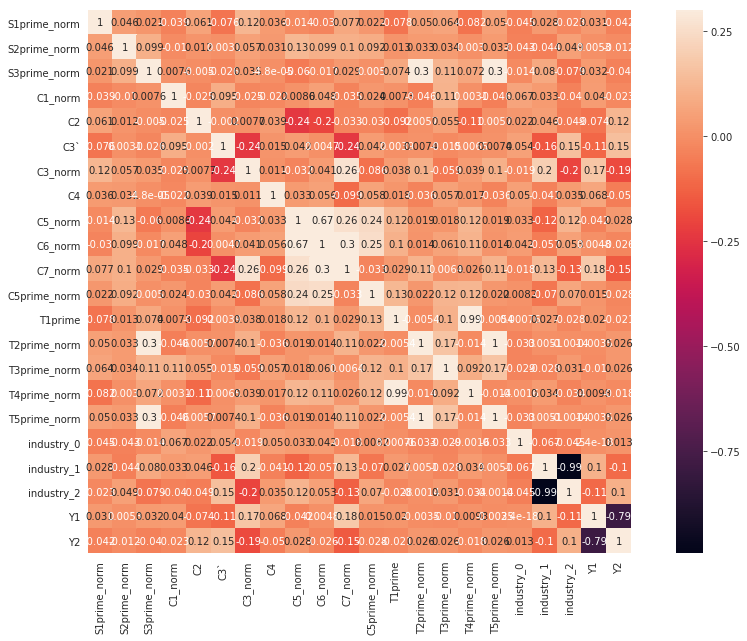

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = I3bin_one_hot.corr()

mask = np.zeros_like(corrMatrix)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=.3, square=True,annot=True)

## Feature Selections 

In [120]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [121]:
len(I3bin_one_hot.columns)

22

In [122]:
len(I3bin_one_hot.columns)

22

In [123]:
# because we add 3 this will be different 
# X = array[:,0:17] #features
# Y1 = array[:,18] #target
# Y2 = array[:,19]
array = I3bin_one_hot.values
X = array[:,0:19] #features
Y1 = array[:,20] #target
Y2 = array[:,21]

In [124]:
X.shape

(660, 19)

In [125]:
Y1.shape

(660,)

In [126]:
Y2.shape

(660,)

In [127]:
I3bin_one_hot.columns

Index(['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C2', 'C3`',
       'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm', 'industry_0', 'industry_1', 'industry_2', 'Y1', 'Y2'],
      dtype='object')

These are our features selected for `Y1`. These features will be put into the Evaluation Code for our 'base score'. We can then use the `heatmap` created above to assist in added or subtracting features to get a better score. 

In [128]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False  True False  True False False False  True False
  True False False  True False False False]
Feature Ranking: [15 14 10  7  1  6  1  3  2 11  1  5  1 12 13  1  8  9  4]


In [129]:
# select y1 features
y1_features = I3bin_one_hot[['C2','C3_norm','C7_norm','T1prime','T3prime_norm','Y1']]
#y1_features = I3bin_one_hot[['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C2', 'C3`',
      # 'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
      # 'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
      # 'T5prime_norm', 'industry_0', 'industry_1', 'industry_2','Y1']]


y1_features.to_csv('y1_features.csv')

In [130]:
I3bin_one_hot.columns

Index(['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C2', 'C3`',
       'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
       'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
       'T5prime_norm', 'industry_0', 'industry_1', 'industry_2', 'Y1', 'Y2'],
      dtype='object')

These are our features for `Y2`. 

In [131]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y2)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False  True  True  True False False False False False
  True False False  True False False False]
Feature Ranking: [12 15  8 10  1  1  1  4  3 13  2  6  1  9 11  1  7 14  5]


In [132]:
y2_features = I3bin_one_hot[['C2', 'C3`','C3_norm','T1prime','T3prime_norm','Y2']]
#y2_features = I3bin_one_hot[['S1prime_norm', 'S2prime_norm', 'S3prime_norm', 'C1_norm', 'C2', 'C3`',
     #  'C3_norm', 'C4', 'C5_norm', 'C6_norm', 'C7_norm', 'C5prime_norm',
     #  'T1prime', 'T2prime_norm', 'T3prime_norm', 'T4prime_norm',
     #  'T5prime_norm', 'industry_0', 'industry_1', 'industry_2','Y2']]

y2_features.to_csv('y2_features.csv')

## Conclusions 

After several rounds of feature selection and trial and error, we were able to acieve our highest validation scores. The most relevent features were as follows:
- Y1 [`C7_norm, T3prime_norm, Y1`] 
validation score: 0.600

- Y2 [`C3', T3prime_norm, Y2`]
validation score: 0.594


As a result, we can answer for our client which features are most important to the "underpricing" phenomenon most commenly seen in the stock market.

For Pre-IPO Price Revision `Y1` the most influencial features are sales `C7` and number of real words used `T3`.
For Post-IPO Initial Return `Y2` the most influencial features are the positive EPS dummy `C3'`* and the number of real words used `T3`.

*It is important to note that `C3'` was a dummy variable set to one if `C3` was positive at the time of IPO. As a result, you could assume that a psoitive earnings per share `C3` value is important was discussing 'underpricing'

# END